Methods cant handle sparse graphs

In [45]:
# from dag_gen.acyclic_graph_generator import AcyclicGraphGenerator
import json
import pandas as pd
import cdt
import networkx as nx
import warnings
# from causalnex.structure import StructureModel
# from causalnex.plots import plot_structure
# from causalnex.structure.notears import from_pandas, from_numpy
from IPython.display import Image
import numpy as np
import os
# warnings.filterwarnings("ignore")  # silence warnings

# cdt.SETTINGS.rpath = 'C:\Program Files\R\R-4.2.1\\bin\Rscript' # path to your r executable
# cdt.SETTINGS.rpath

'C:\\Program Files\\R\\R-4.2.1\\bin\\Rscript'

In [41]:
DATA_DIR = 'data/'

In [42]:
with open("data_config.json", 'r') as f:
  data_config = json.load(f)

In [14]:
# for dataset_group, datasets in data_config.items():
#     dataset_group_path = os.path.join(DATA_DIR, dataset_group)
#     if not os.path.isdir(DATA_DIR):
#         os.mkdir(DATA_DIR)
#     if not os.path.isdir(dataset_group_path):
#         os.mkdir(dataset_group_path)
#     for dataset_name, generator_config in datasets.items():
#         dataset_path = os.path.join(dataset_group_path, dataset_name)
#         # If directory doesn't exist or isn't empty
#         if not os.path.isdir(dataset_path):
#             os.mkdir(dataset_path)
#         if len(os.listdir(dataset_path)) == 0:
#             generator = AcyclicGraphGenerator(**generator_config)
#             generator.generate_to_folder(data_path=dataset_path, data_index=1)

In [43]:
# adjacency = np.load(DATA_DIR+"mix_mechanism\medium_all\DAG1.npy")
data = np.load(DATA_DIR+"mix_mechanism\medium_all\data1.npy")

# conf_adjacency = np.load(DATA_DIR+"mix_mechanism\medium_all\confounder_DAG1.npy")
# conf_data = np.load(DATA_DIR+"mix_mechanism\medium_all\confounder_data1.npy")

In [ ]:
data = data[0:100, 0:3]
# np.save(DATA_DIR+"mix_mechanism\medium_all\data1.npy", data)

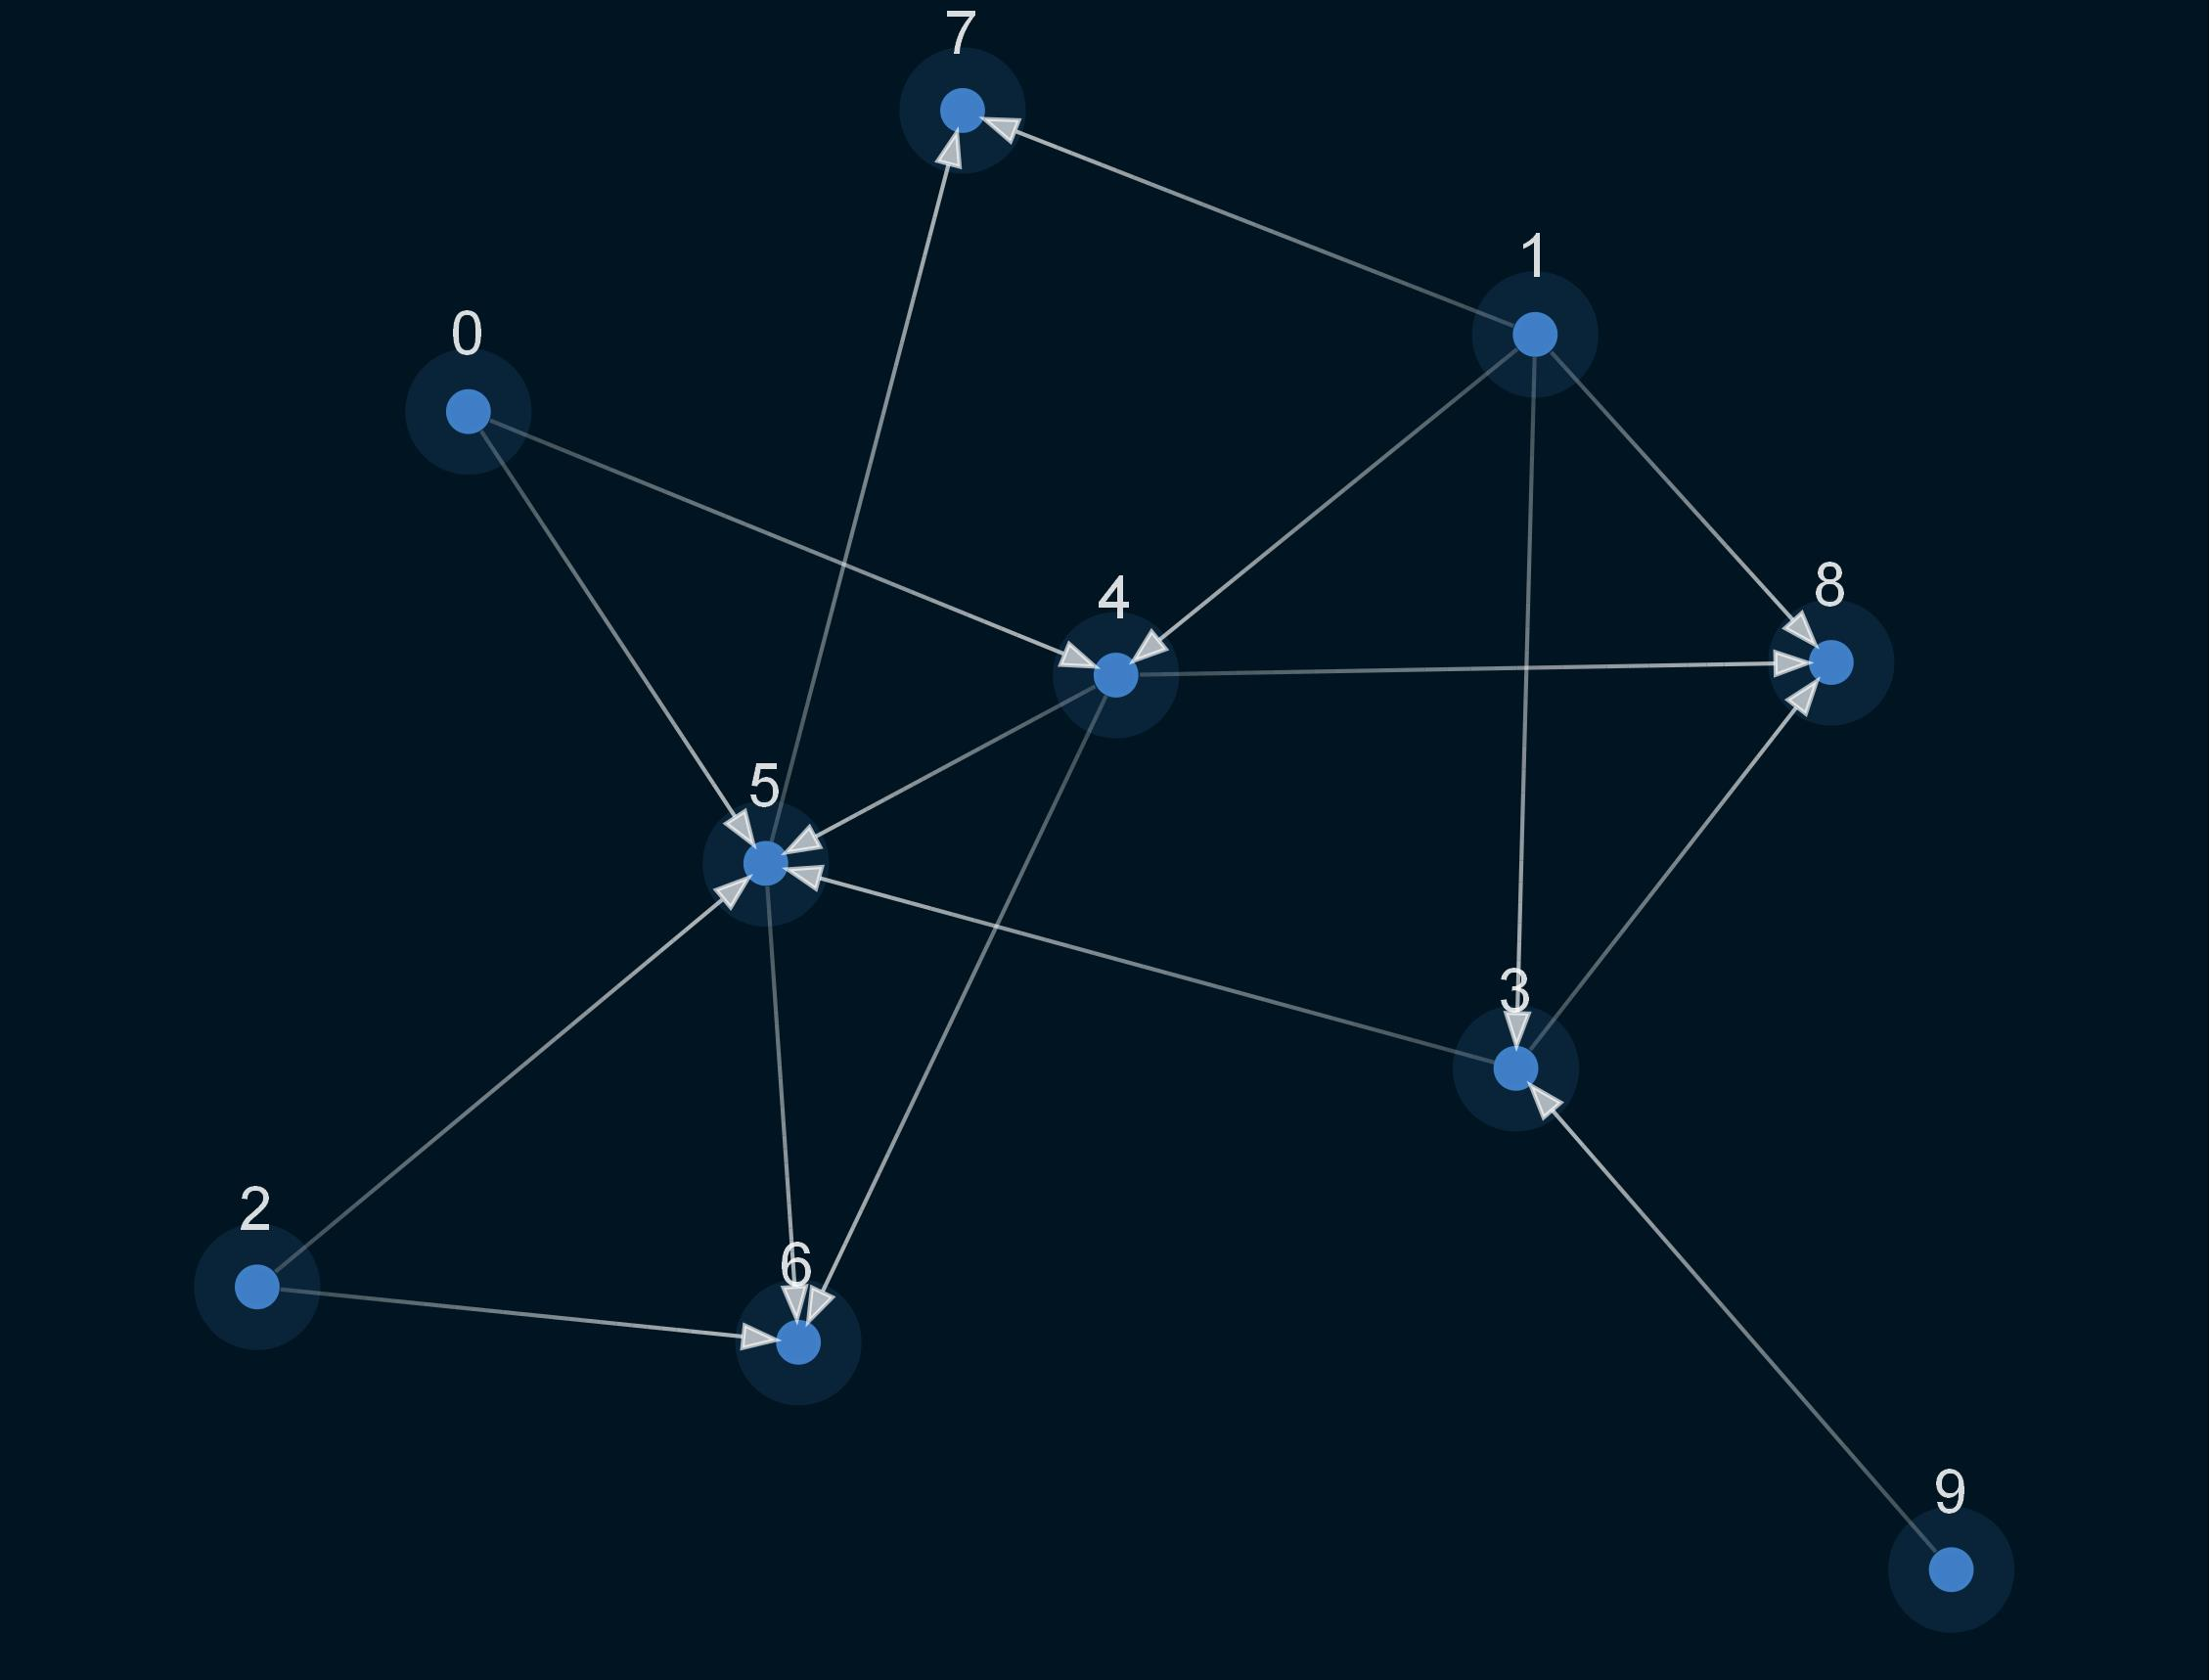

In [28]:
# graph = nx.from_numpy_array(adjacency, create_using=nx.DiGraph)
# e = list(graph.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

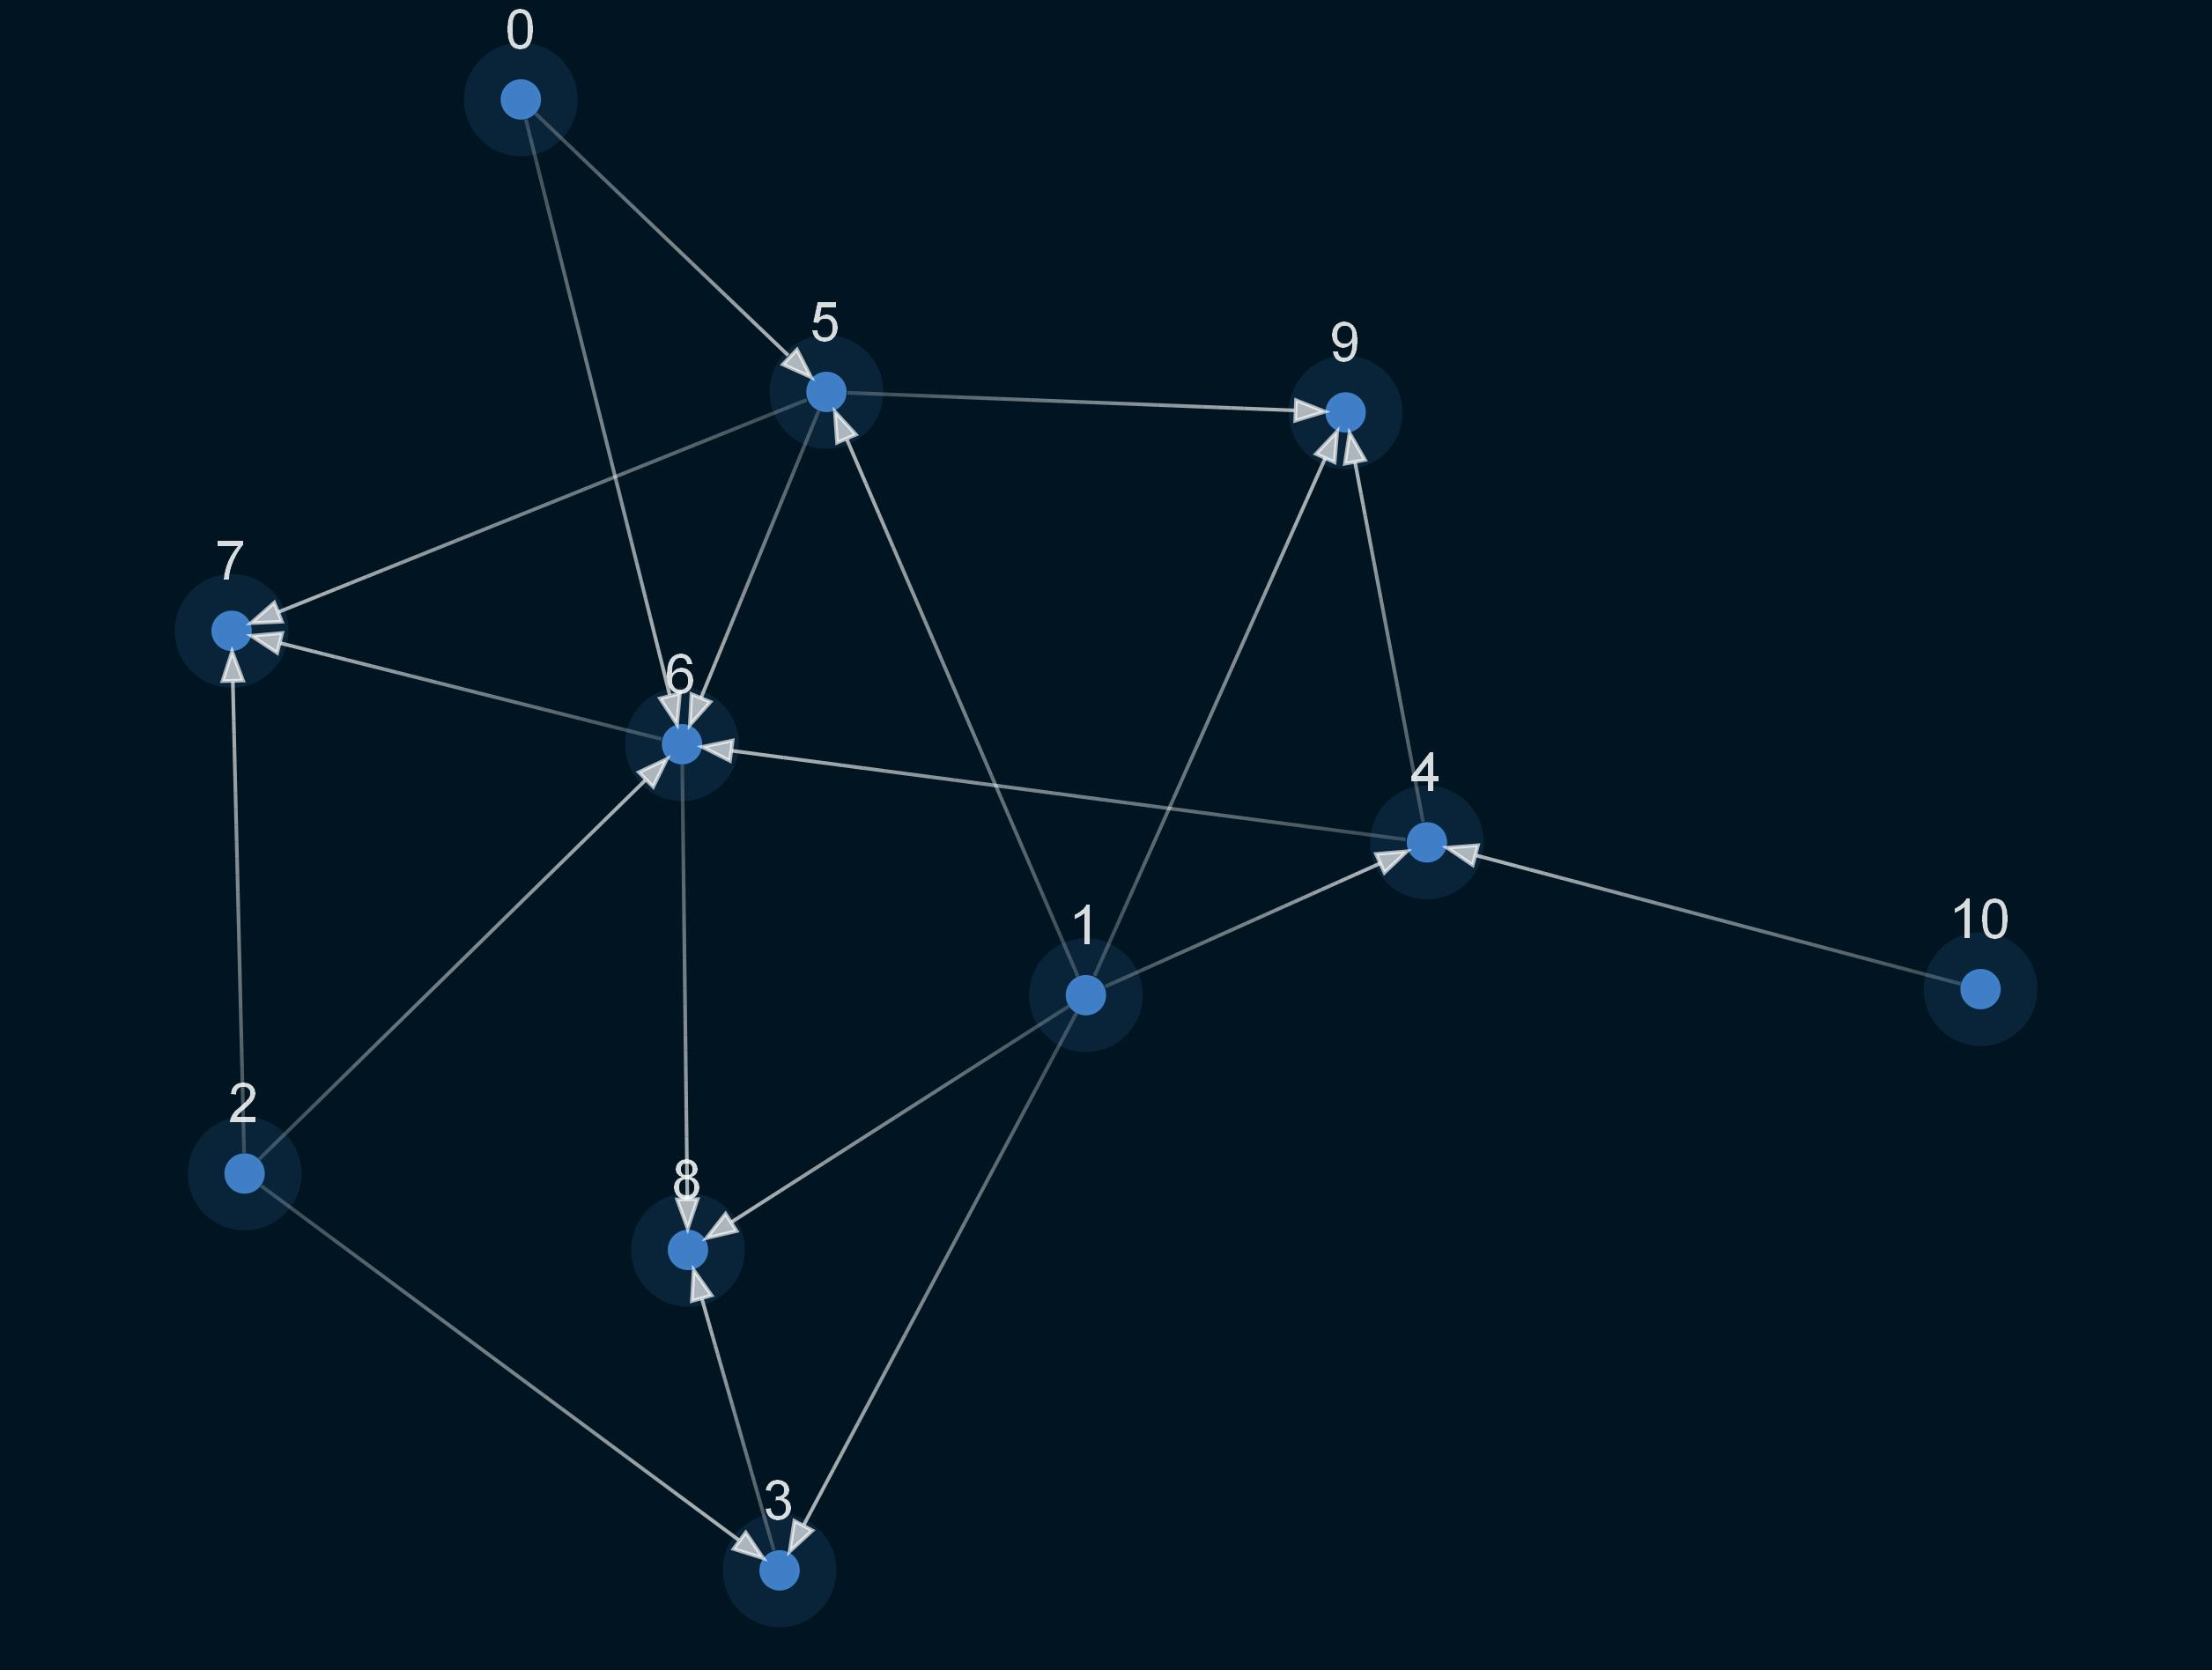

In [29]:
# conf_graph = nx.from_numpy_array(conf_adjacency, create_using=nx.DiGraph)
# e = list(conf_graph.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

# CAM

In [35]:
from cdt.causality.graph import CAM
from pandas import DataFrame
obj = CAM()
output = obj.predict(DataFrame(data))

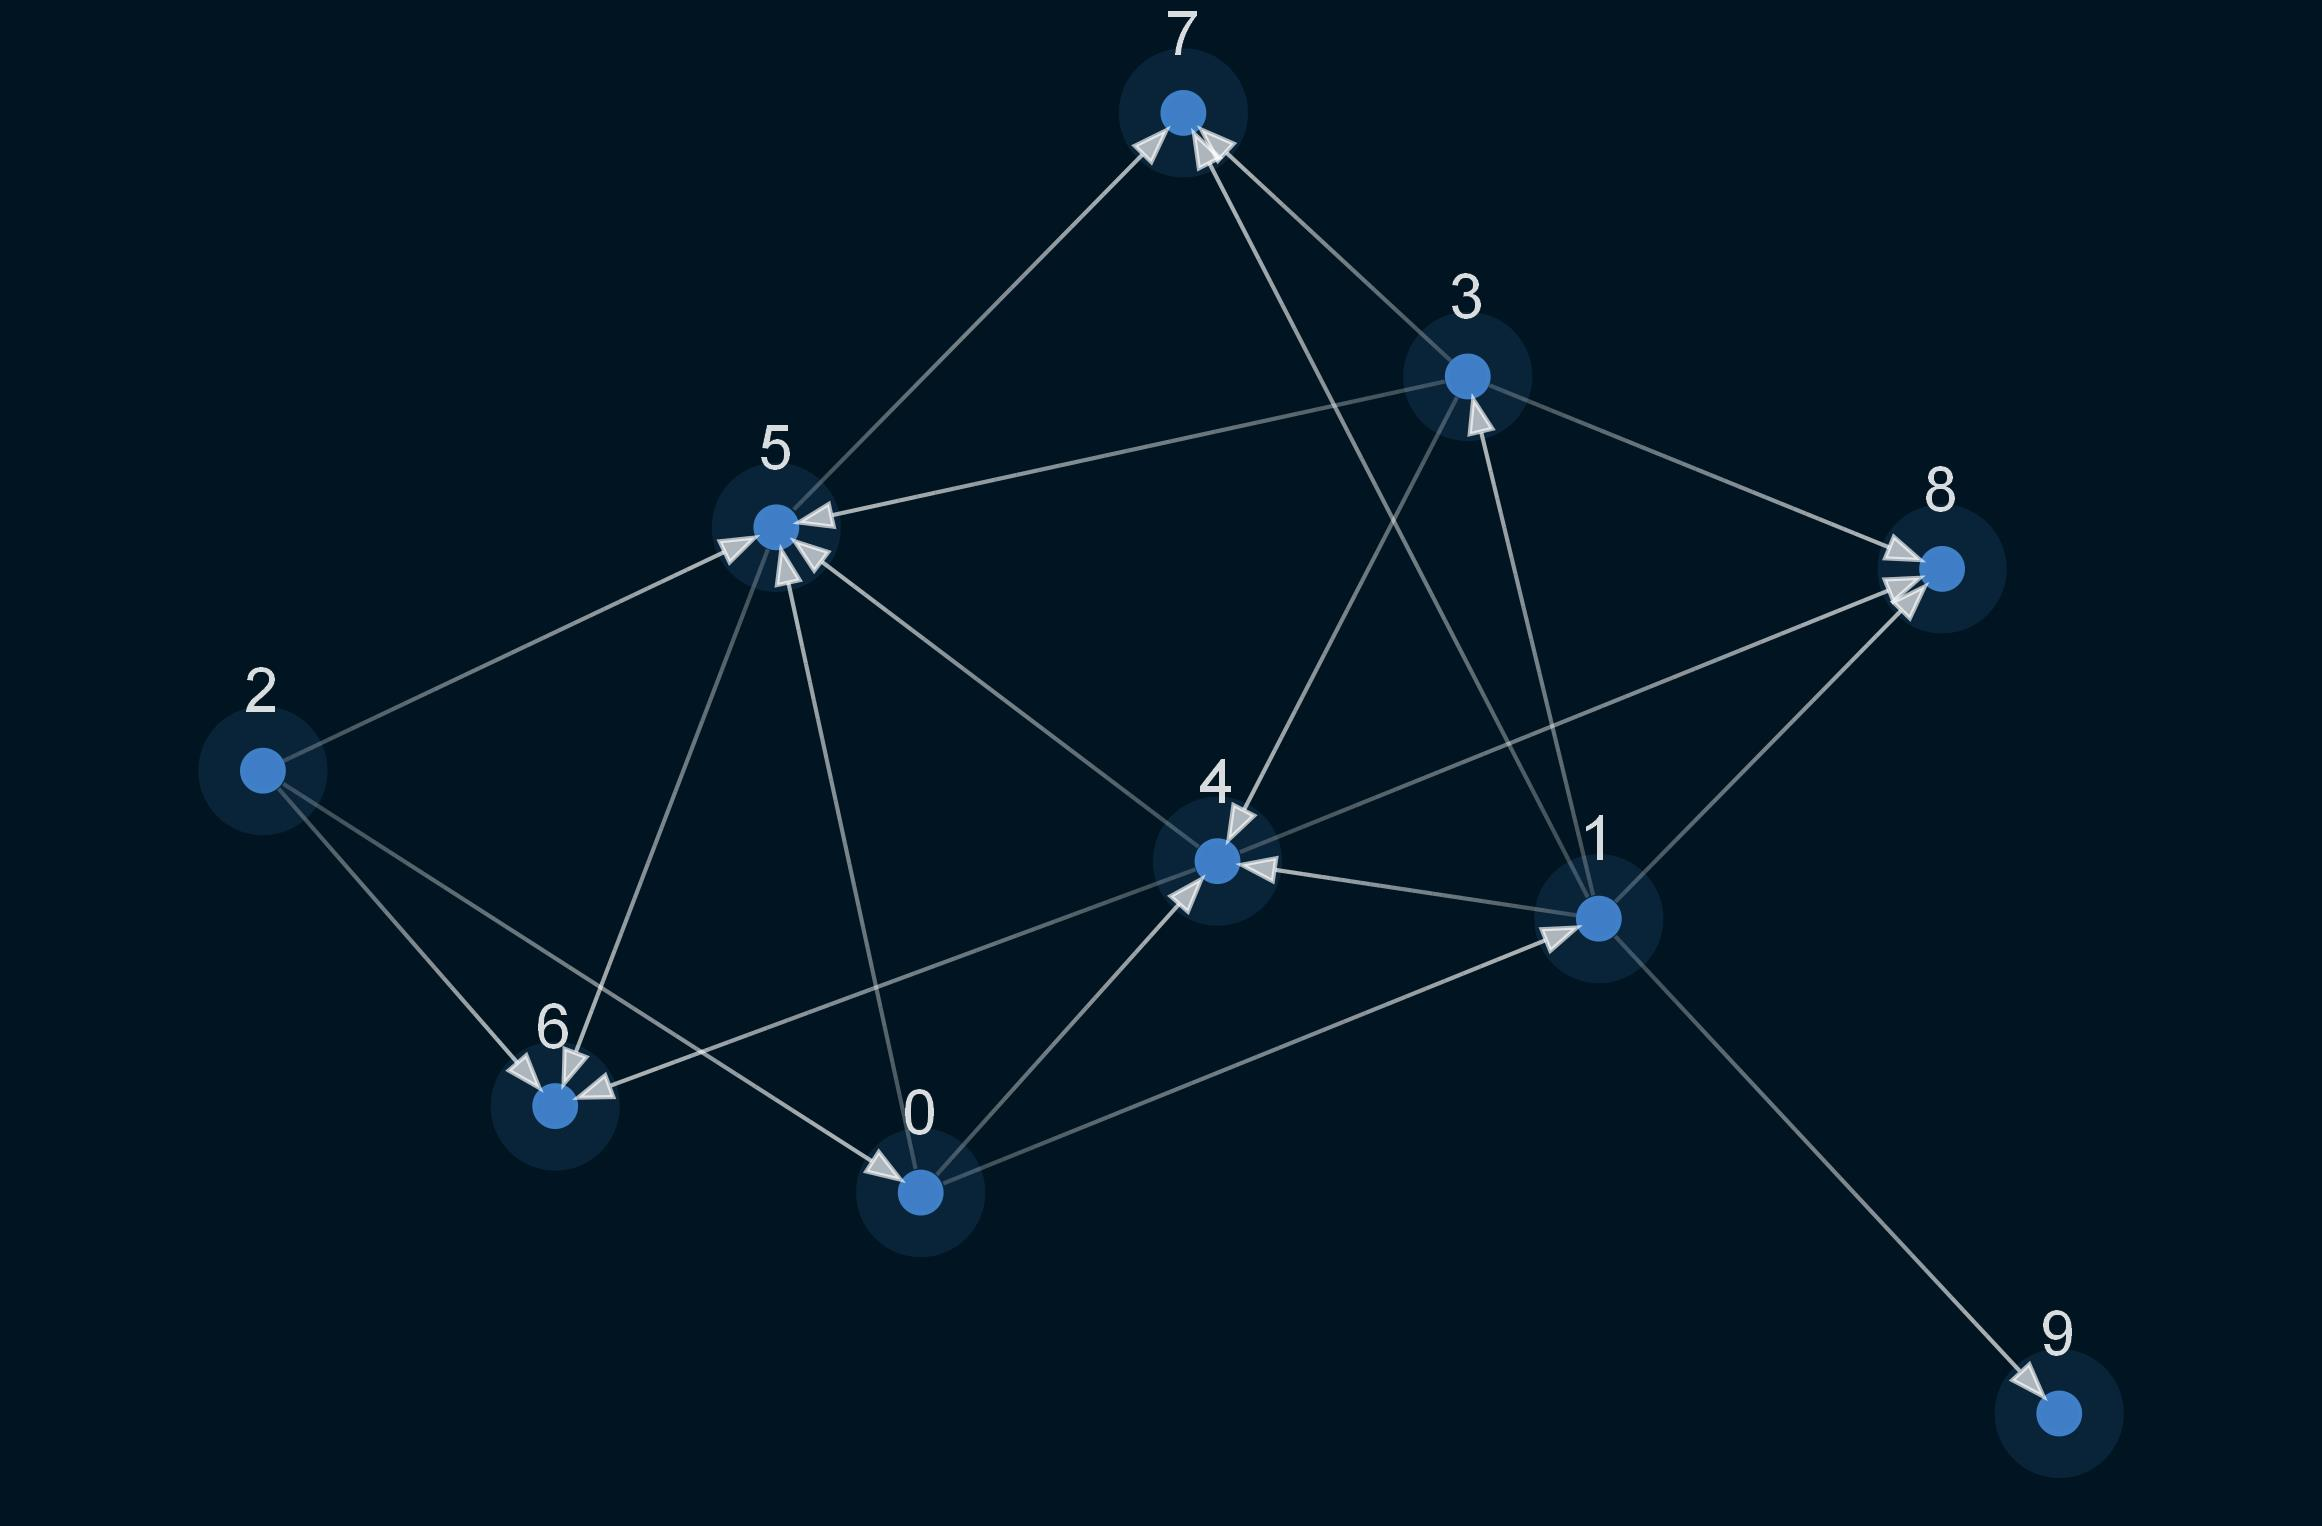

In [36]:
# e = list(output.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

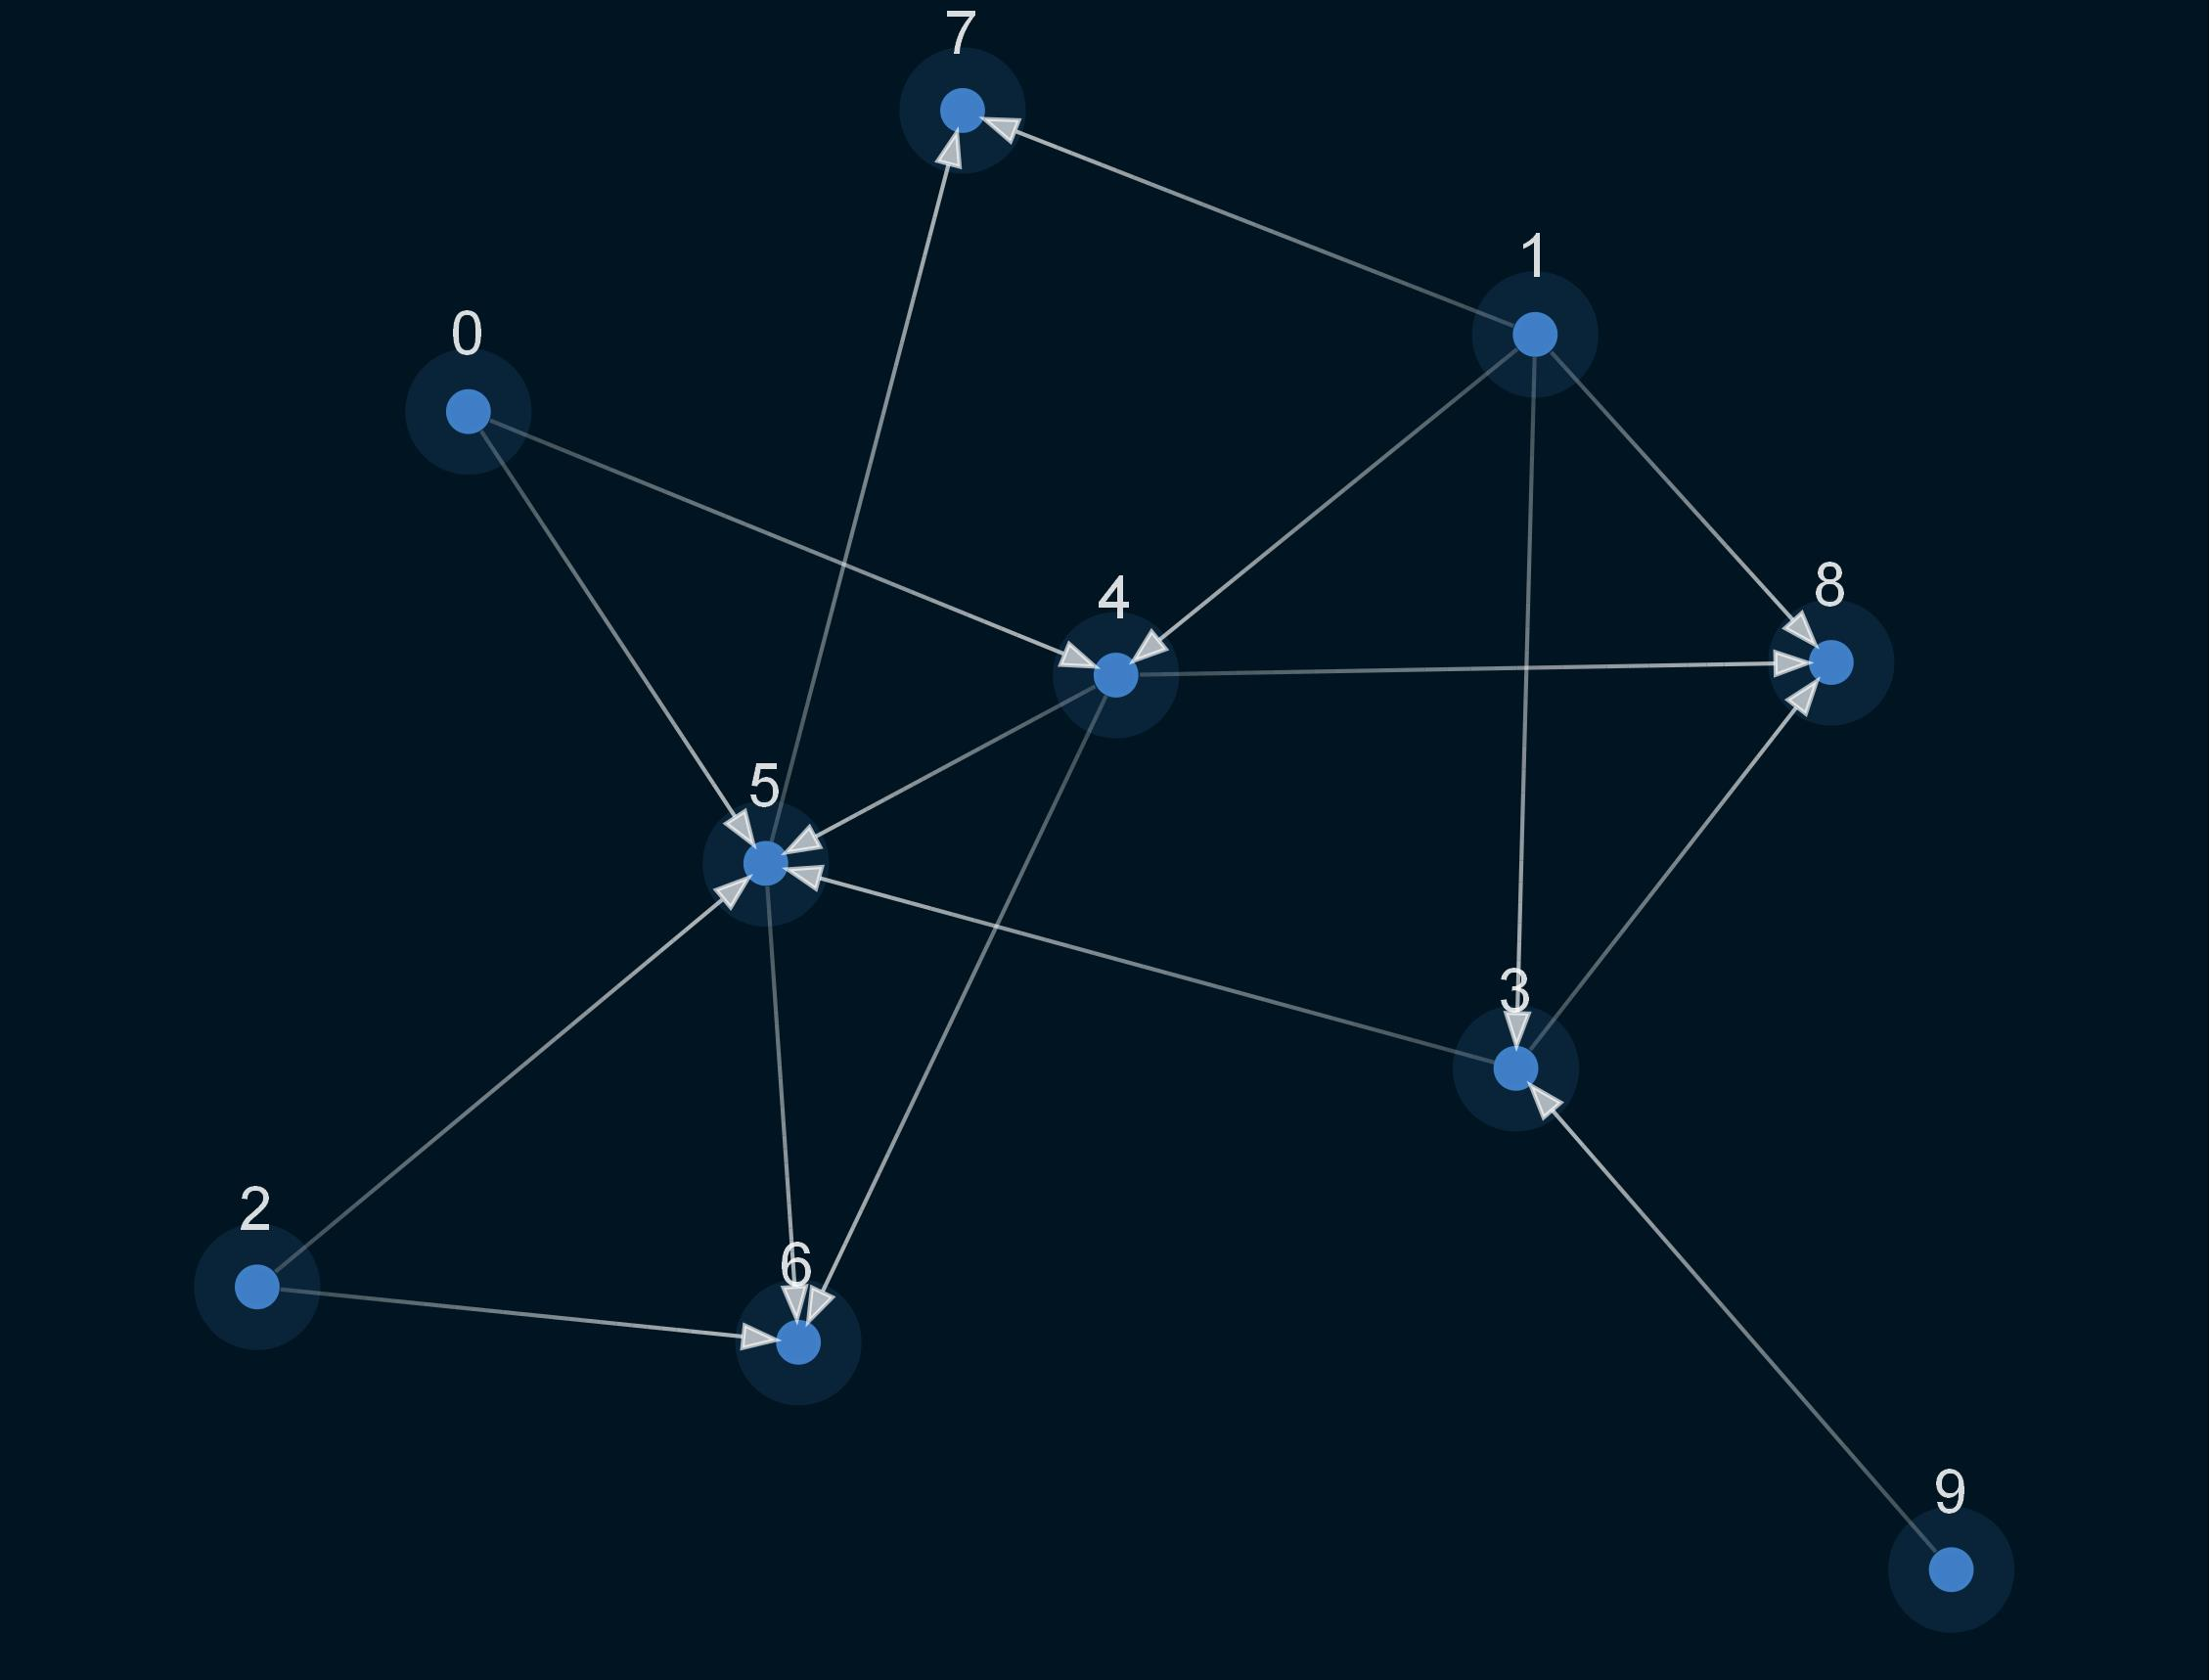

In [37]:
# e = list(graph.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

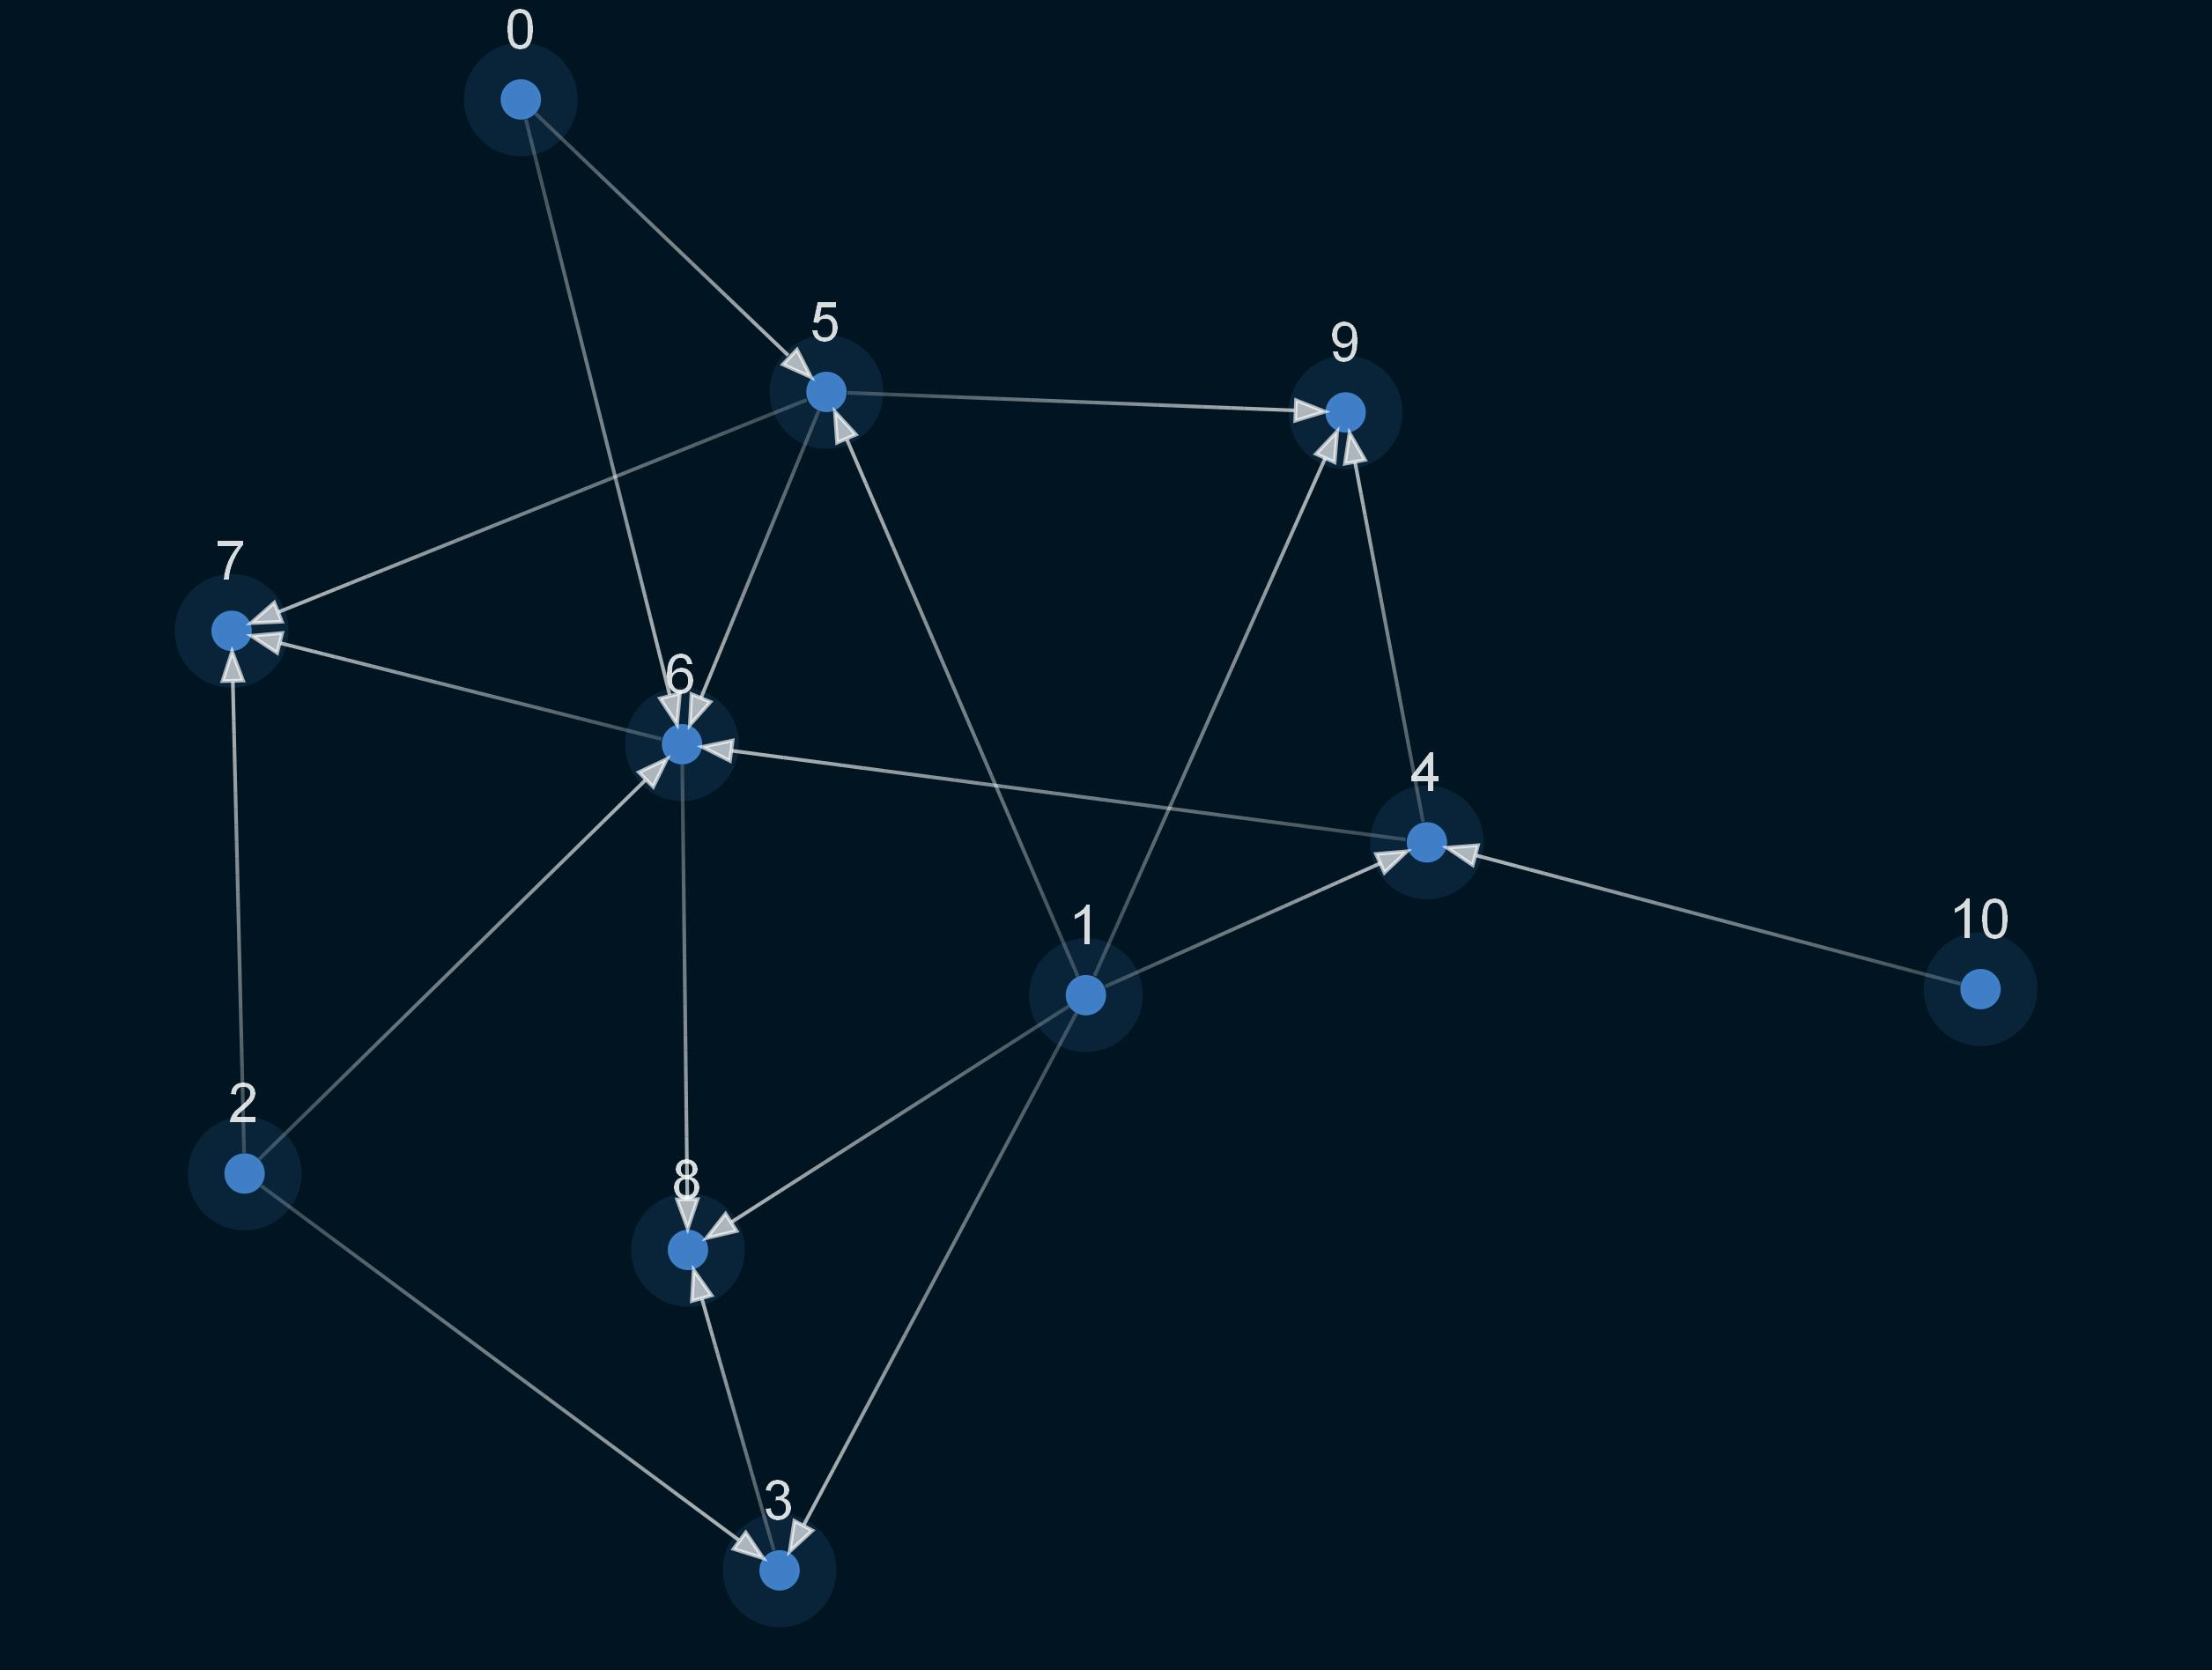

In [38]:
# e = list(conf_graph.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

# SAM

In [8]:
import networkx as nx
from cdt.causality.graph import SAM
from cdt.data import load_dataset
obj = SAM(gpus=1, njobs=6, train_epochs=2000, test_epochs=750, nruns=5)
#The predict() method works without a graph, or with a
#directed or undirected graph provided as an input
output = obj.predict(data)    #No graph provided as an argument
# output = obj.predict(data, nx.Graph(graph))  #With an undirected graph
# output = obj.predict(data, graph)  #With a directed graph
#To view the graph created, run the below commands:
# e = list(output.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

In [ ]:
# e = list(graph.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

# NOTEAR

In [48]:
from test_algo.notears import notears

In [ ]:
output_dict = notears.run(notears.notears_standard, data, notears.loss.least_squares_loss, notears.loss.least_squares_loss_grad, e=1e-8, verbose=False)

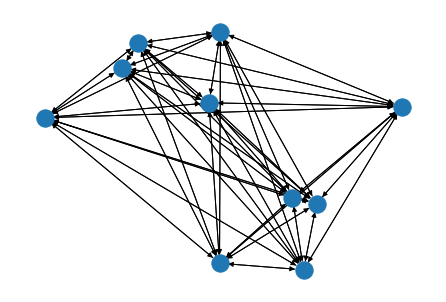

In [50]:
# e = list(pred_graph.edges())
# nx.draw(pred_graph)
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

In [ ]:
import numpy as np
def varsortability(X, W, tol=1e-9):
    """ Takes n x d data and a d x d adjaceny matrix,
    where the i,j-th entry corresponds to the edge weight for i->j,
    and returns a value indicating how well the variance order
    reflects the causal order. """
    E = W != 0
    Ek = E.copy()
    var = np.var(X, axis=0, keepdims=True)

    n_paths = 0
    n_correctly_ordered_paths = 0

    for _ in range(E.shape[0] - 1):
        n_paths += Ek.sum()
        n_correctly_ordered_paths += (Ek * var / var.T > 1 + tol).sum()
        n_correctly_ordered_paths += 1/2*(
            (Ek * var / var.T <= 1 + tol) *
            (Ek * var / var.T >  1 - tol)).sum()
        Ek = Ek.dot(E)

    return n_correctly_ordered_paths / n_paths

In [ ]:
varsortability(data.to_numpy(), nx.to_numpy_array(graph))